In [1]:
using CSV, DataFrames, Gadfly, Distributions, SparseArrays, LinearAlgebra

include("iGMRF.jl");
include("dataGen.jl");

# Création de la grille à 9 cellules

Chaque cellule est représentée par un triplet $[\mu, \sigma, \xi]$ indiquant les vraie valeur des paramètres de la GEV à déterminer.

In [2]:
# Seed
Random.seed!(400)
# Dimensions de la grille
m₁ = 3;
m₂ = 3;
# Nb total de cellules
m = m₁ * m₂
# Insuffisance de rang de la matrice de structure
r = 1;
# Hyperparamètres
κᵤ = 100.0;
# Matrice de structure
F = iGMRF(m₁, m₂, κᵤ);

In [3]:
grid_target = generateTargetGrid(F);

In [4]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

# Génération de données

Le but est de générer des données sur chaque cellule à partir des paramètres de la GEV de la grille cible.

In [5]:
nobs = 1000
data = generateData(grid_target, nobs);

# Modèle 

In [11]:
include("malaWG.jl");

niter = 10000
h = 0.0006
θ₀ = vcat([10], zeros(m))
F = iGMRF(3, 3, 10)

θ = malaWG(niter, h, θ₀, Y=data, F=F);

μ = θ[2:end, :];
κᵤ = θ[1, :];

μ̂ = mean(θ[2:end, :], dims=2);
κ̂ᵤ = mean(θ[1, :]);

Taux d'acceptation: 69.28 %


In [13]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

Distance entre les deux matrices

In [14]:
norm(reshape(μ̂, m₁, m₂) .- grid_target[:, :, 1], 2) / m

0.027501926182394033

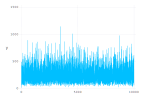

In [15]:
plot(y=κᵤ, Geom.line)

In [16]:
mean(κᵤ)

237.4767812907055

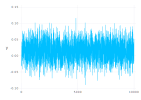

In [17]:
plot(y=μ[1, :], Geom.line)

In [52]:
using Mamba

sim = Chains(
    copy(θ'), 
    names=["κᵤ", "μ1", "μ2", "μ3", "μ4", "μ5", "μ6", "μ7", "μ8", "μ9"]
);

summarystats(sim)

        Mean            SD         Naive SE        MCSE        ESS   
κᵤ 240.5946163443 128.083110644 1.28083110644 2.04799024874 3911.3616
μ1   0.0145697796   0.026758361 0.00026758361 0.00061401283 1899.1713
μ2  -0.0178597267   0.025313966 0.00025313966 0.00053679310 2223.8554
μ3  -0.0860571213   0.027688598 0.00027688598 0.00066528199 1732.1695
μ4   0.0533280698   0.026396088 0.00026396088 0.00064211234 1689.8848
μ5  -0.0011177386   0.024205349 0.00024205349 0.00048147244 2527.4340
μ6  -0.0485243151   0.025183507 0.00025183507 0.00058390223 1860.1680
μ7   0.0412799282   0.026857199 0.00026857199 0.00059507912 2036.9108
μ8  -0.0227950765   0.025416274 0.00025416274 0.00054119372 2205.5570
μ9  -0.0543230589   0.027080379 0.00027080379 0.00063348560 1827.4099

